# lxd-io

Create a `Dataset` object with to load a dataset. `lxd-io` automatically searches the relevant recordings and maps in the dataset folder.

In [ ]:
from lxd_io import Dataset

# TODO: Replace by your path to dataset
dataset_path = "/path/to/data/exiD-dataset-v2.1"

dataset = Dataset(dataset_path)

2025-03-13 11:43:33.367 | DEBUG    | lxd_io.dataset:__init__:45 - Read dataset exid-2.1 from: /work/vater/data/exiD-dataset-v2.1
2025-03-13 11:43:33.368 | DEBUG    | lxd_io.dataset:_explore_data_dir:156 - Search for recordings in: /work/vater/data/exiD-dataset-v2.1/data
2025-03-13 11:43:33.512 | DEBUG    | lxd_io.dataset:_explore_data_dir:216 - Found complete data for 93 recordings:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92]
2025-03-13 11:43:33.512 | DEBUG    | lxd_io.dataset:_explore_maps_dir:220 - Search for maps in: /work/vater/data/exiD-dataset-v2.1/maps


The dataset object has some high-level properties like the dataset ID and version, a list of contained recordings, locations and a mapping between locations and recordings.

In [2]:
print(f"Dataset ID: {dataset.id}")
print(f"Dataset version: {dataset.version}")

print(f"Available recordings: {dataset.recording_ids}")
print(f"Available locations: {dataset.location_ids}")
print(f"Available recordings at locations: {dataset.recordings_at_location}")

Dataset ID: exid
Dataset version: 2.1
Available recordings: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92]
Available locations: [0, 1, 2, 3, 4, 5, 6]
Available recordings at locations: {0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], 1: [19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38], 2: [39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52], 3: [53, 54, 55, 56, 57, 58, 59, 60], 4: [61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72], 5: [73, 74, 75, 76, 77], 6: [78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92]}


Get a specific recording as a `Recording` object to access. To get the recording with `recording_id` 1 from the dataset, use

In [3]:
print("Get a recording")
recording = dataset.get_recording(1)

2025-03-13 11:43:33.529 | DEBUG    | lxd_io.dataset:get_recording:290 - Get recording 1.
2025-03-13 11:43:33.530 | DEBUG    | lxd_io.recording:__init__:31 - Load csv files for recording 1.


Get a recording


A recording contains information about meta data, maps and tracks.

In [4]:
print("Recording meta data keys")
print(recording.meta_data_keys)

print("Recording location ID")
print(recording.location_id)

print("lanelet2 map file")
print(recording.lanelet2_map_file)

print("OpenDRIVE map file")
print(recording.opendrive_map_file)

# Get the list of track ids
print("Recording track ids")
print(f"First 20 track ids: {recording.track_ids[:20]}")
print(f"Total number of track ids: {len(recording.track_ids)}")

Recording meta data keys
['recordingId', 'locationId', 'frameRate', 'speedLimit', 'weekday', 'startTime', 'duration', 'numTracks', 'numVehicles', 'numVRUs', 'latLocation', 'lonLocation', 'xUtmOrigin', 'yUtmOrigin', 'orthoPxToMeter', 'exportVersion']
Recording location ID
0
lanelet2 map file
/work/vater/data/exiD-dataset-v2.1/maps/lanelet2/0_cologne_butzweiler/location0.osm
OpenDRIVE map file
/work/vater/data/exiD-dataset-v2.1/maps/opendrive/0_cologne_butzweiler/cologne_butzweiler.xodr
Recording track ids
First 20 track ids: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Total number of track ids: 877


It also has some convenience functions to filter tracks by frame.

In [5]:
# Get the list of frames
print("Recording frames")
print(f"First 20 recording frames: {recording.frames[:20]}")
print(f"Total number of recording frames: {len(recording.frames)}")

# Get track_ids at certain frame
track_ids_at_frame = recording.get_track_ids_at_frame(500)
print("Track ids at certain frame")
print(track_ids_at_frame)

2025-03-13 11:43:33.545 | DEBUG    | lxd_io.recording:_read_tracks_file:62 - Load tracks file for recording 1


Recording frames
First 20 recording frames: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Total number of recording frames: 13851
Track ids at certain frame
[20, 24, 26, 29, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58]


To get a specific track (here: track with ID `25`), use

In [6]:
# Get a track
print("Get track 25")
track = recording.get_track(25)

Get track 25


A `Track` object contains meta data (`*_tracksMeta.csv`) as well as data (`*_tracks.csv`)

In [7]:
# Read meta data of track
print("Track meta data keys")
print(track.meta_data_keys)

initial_frame = track.get_meta_data("initialFrame")
print("Initial frame")
print(initial_frame)

# Read data of track
print("Track data keys")
print(track.data_keys)

lon_velocity = track.get_data("lonVelocity")
print("Lon velocity")
print(lon_velocity[:20])

Track meta data keys
['recordingId', 'trackId', 'initialFrame', 'finalFrame', 'numFrames', 'width', 'length', 'class']
Initial frame
37
Track data keys
['recordingId', 'trackId', 'frame', 'trackLifetime', 'xCenter', 'yCenter', 'heading', 'width', 'length', 'xVelocity', 'yVelocity', 'xAcceleration', 'yAcceleration', 'lonVelocity', 'latVelocity', 'lonAcceleration', 'latAcceleration', 'traveledDistance', 'latLaneCenterOffset', 'laneWidth', 'laneletId', 'laneChange', 'lonLaneletPos', 'laneletLength', 'leadDHW', 'leadDV', 'leadTHW', 'leadTTC', 'leadId', 'rearId', 'leftLeadId', 'leftRearId', 'leftAlongsideId', 'rightLeadId', 'rightRearId', 'rightAlongsideId']
Lon velocity
[23.4271 23.4388 23.4508 23.4631 23.4759 23.489  23.5024 23.516  23.5299
 23.5439 23.5581 23.5725 23.5869 23.6013 23.6158 23.6304 23.645  23.6596
 23.6743 23.6889]


Plot data

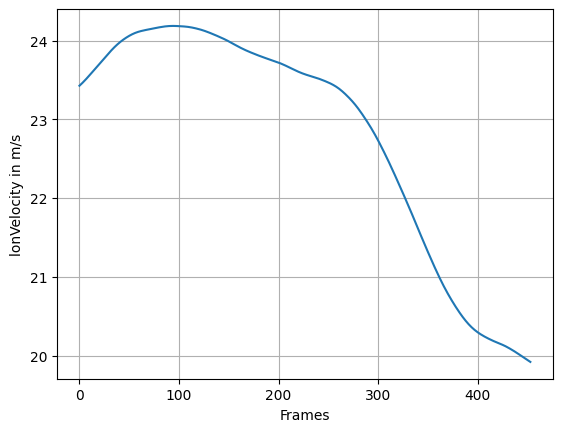

In [8]:
import matplotlib.pyplot as plt

plt.plot(lon_velocity)
plt.xlabel("Frames")
plt.ylabel("lonVelocity in m/s")
plt.grid()

Data can also be filtered by frame or frame ranges

In [9]:
# Read data at a certain frame
lon_velocity_at_frame = track.get_data_at_frame("lonVelocity", initial_frame + 2)
print(f"lonVelocity at frame: {initial_frame + 2}")
print(lon_velocity_at_frame)

# Read data between frames
start_frame = initial_frame + 2
end_frame =  initial_frame + 10
lon_velocity_between_frames = track.get_data_between_frames("lonVelocity", start_frame, end_frame)
print(f"lonVelocity between frames: {start_frame}, {end_frame}")
print(lon_velocity_between_frames)

lonVelocity at frame: 39
23.4508
lonVelocity between frames: 39, 47
[23.4508 23.4631 23.4759 23.489  23.5024 23.516  23.5299 23.5439 23.5581]


A recording also contains convenvience methods to plot single or multiple tracks to the background image.

In [10]:
import matplotlib.pyplot as plt

Plot a single track

2025-03-13 11:43:35.835 | DEBUG    | lxd_io.recording:_plot_single_track:234 - Plot recording 1, track 25


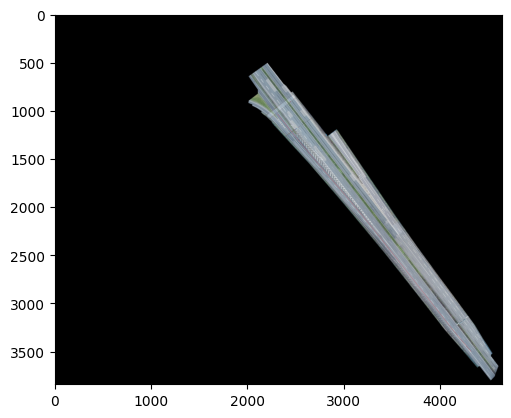

In [11]:
plot_file = recording.plot_track(25, ".")

im = plt.imread(plot_file)
plt.imshow(im)

Plot multiple tracks

2025-03-13 11:43:42.244 | DEBUG    | lxd_io.recording:_plot_multiple_tracks:260 - Plot recording 1, tracks [20, 24, 26, 29, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58]


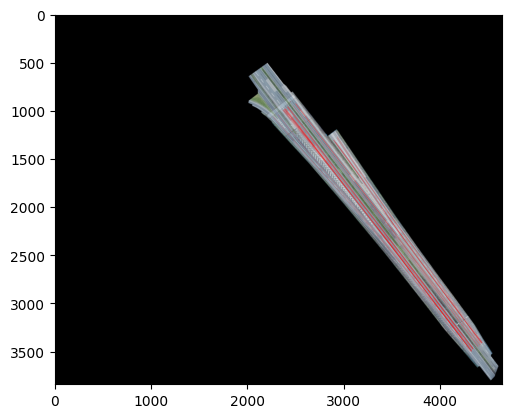

In [12]:
plot_file = recording.plot_track(track_ids_at_frame, ".")

im = plt.imread(plot_file)
plt.imshow(im)